In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, f1_score


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [16]:

df = pd.read_csv('train.csv') 

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,-1,0,unknown,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,-1,0,unknown,yes
39997,54,admin.,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,-1,0,unknown,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,90,7,other,no


In [18]:
df.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:

df.dropna()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,-1,0,unknown,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,-1,0,unknown,yes
39997,54,admin.,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,-1,0,unknown,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,90,7,other,no


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  pdays      40000 non-null  int64 
 14  previous   40000 non-null  int64 
 15  poutcome   40000 non-null  object
 16  y          40000 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.2+ MB


In [27]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [29]:
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 
            'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
            'previous', 'poutcome']
target = 'y'


In [31]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)


In [33]:
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [35]:
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [37]:
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [39]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [41]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))  # Increase max_iter if needed
])

In [43]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [45]:
y_pred = pipeline.predict(X_test)


In [47]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.94
              precision    recall  f1-score   support

          no       0.95      0.99      0.97      7424
         yes       0.63      0.30      0.40       576

    accuracy                           0.94      8000
   macro avg       0.79      0.64      0.68      8000
weighted avg       0.92      0.94      0.93      8000



In [53]:
df3 = pd.read_csv('test.csv') 
df3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,57,retired,married,secondary,no,718,no,no,cellular,3,jun,170,1,-1,0,unknown
1,50,management,married,secondary,no,268,no,no,cellular,3,jun,74,2,90,2,failure
2,46,technician,single,secondary,no,4367,yes,no,cellular,3,jun,65,1,96,1,failure
3,56,admin.,married,secondary,no,3554,no,no,cellular,3,jun,151,1,-1,0,unknown
4,32,services,single,tertiary,no,785,no,no,cellular,3,jun,273,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
5207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
5208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
5209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [56]:
df3_predictions = pipeline.predict(df3[features]) 


In [58]:
df3['y'] = df3_predictions


In [60]:
df3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,57,retired,married,secondary,no,718,no,no,cellular,3,jun,170,1,-1,0,unknown,no
1,50,management,married,secondary,no,268,no,no,cellular,3,jun,74,2,90,2,failure,no
2,46,technician,single,secondary,no,4367,yes,no,cellular,3,jun,65,1,96,1,failure,no
3,56,admin.,married,secondary,no,3554,no,no,cellular,3,jun,151,1,-1,0,unknown,no
4,32,services,single,tertiary,no,785,no,no,cellular,3,jun,273,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
5207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,no
5208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
5209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [62]:
accuracy = accuracy_score(df3['y'], df3_predictions) 


In [64]:
print(f"Accuracy on df3: {accuracy:.2f}") 


Accuracy on df3: 1.00


In [67]:
df3_predictions = pipeline.predict(df3[features]) 

# Calculate accuracy
accuracy = accuracy_score(df3['y'], df3_predictions) 
print(f"Accuracy: {accuracy:.2f}")

# Get classification report
report = classification_report(df3['y'], df3_predictions)
print(report) 

Accuracy: 1.00
              precision    recall  f1-score   support

          no       1.00      1.00      1.00      4113
         yes       1.00      1.00      1.00      1098

    accuracy                           1.00      5211
   macro avg       1.00      1.00      1.00      5211
weighted avg       1.00      1.00      1.00      5211



In [69]:
# save to csv

df3.to_csv('hackathon8762.csv', index=False)

In [71]:
df3.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

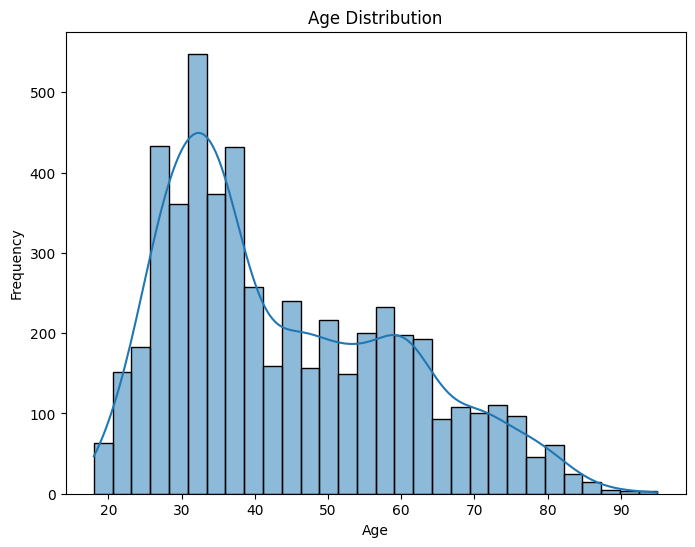

In [74]:
# 1. Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df3['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


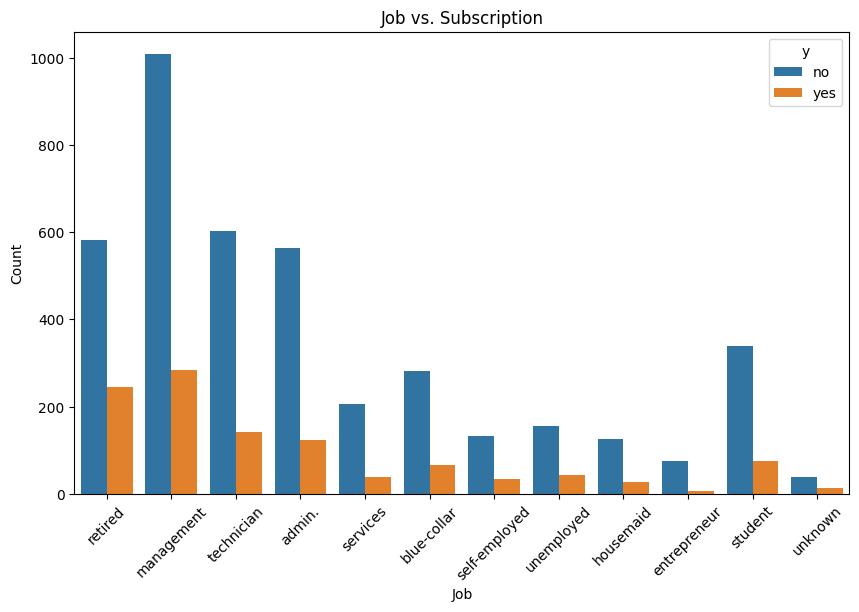

In [76]:
# Job vs. Subscription

plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='y', data=df3)
plt.title('Job vs. Subscription')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

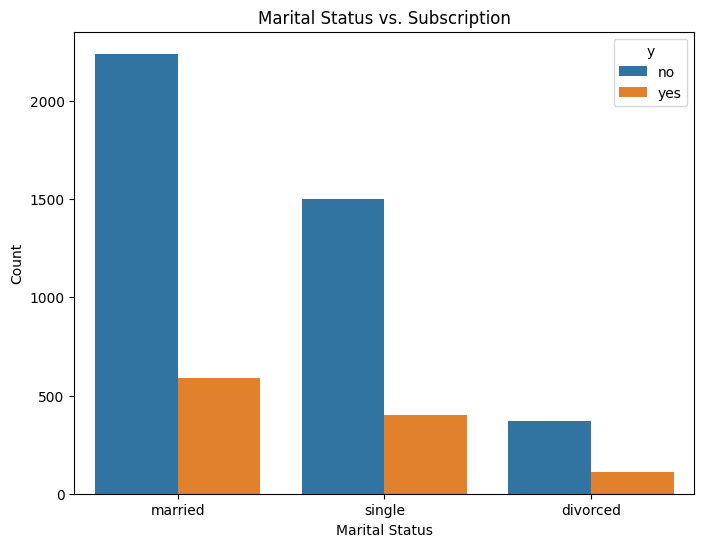

In [78]:
# Marital Status vs. Subscription

plt.figure(figsize=(8, 6))
sns.countplot(x='marital', hue='y', data=df3)
plt.title('Marital Status vs. Subscription')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


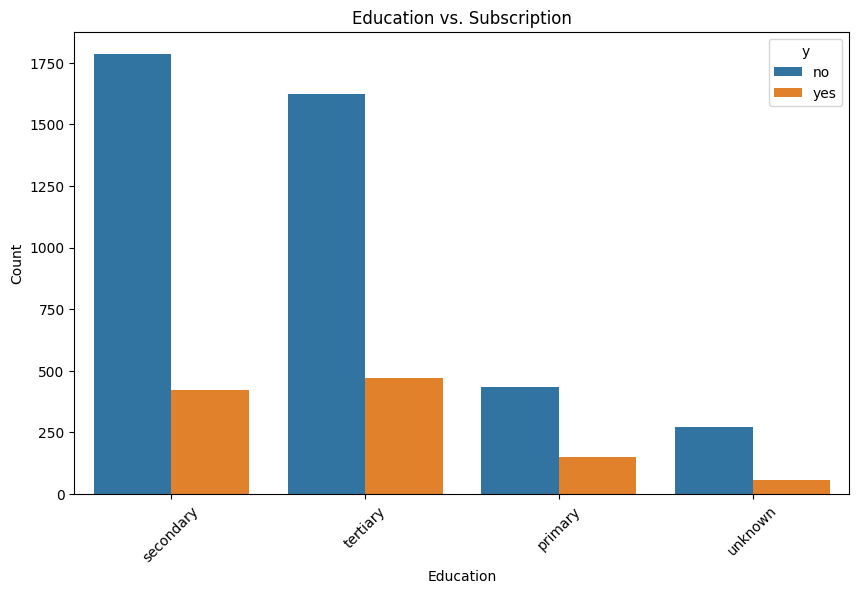

In [80]:
# Education vs. Subscription

plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='y', data=df3)
plt.title('Education vs. Subscription')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

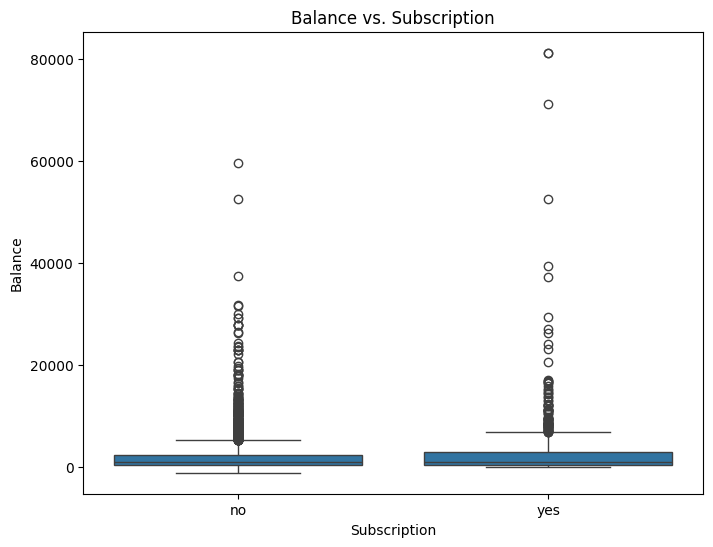

In [82]:
# Balances vs. Subscription

plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='balance', data=df3)
plt.title('Balance vs. Subscription')
plt.xlabel('Subscription')
plt.ylabel('Balance')
plt.show()


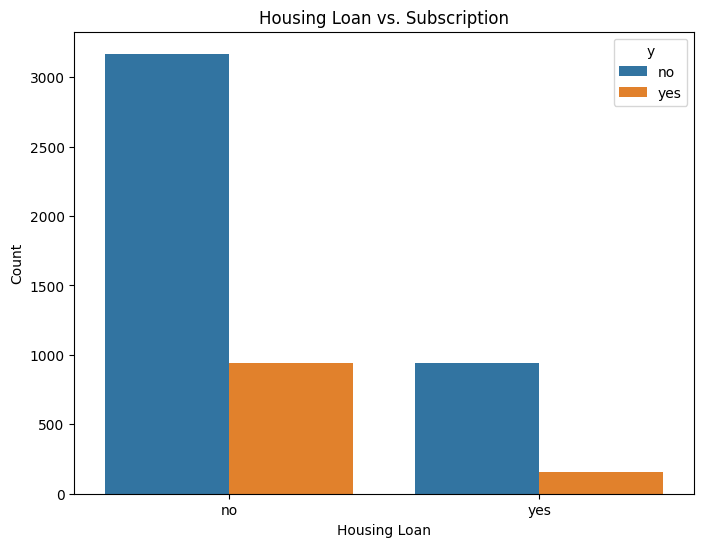

In [103]:
# Housing Loan vs. Subscription
plt.figure(figsize=(8, 6))
sns.countplot(x='housing', hue='y', data=df3)
plt.title('Housing Loan vs. Subscription')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.show()

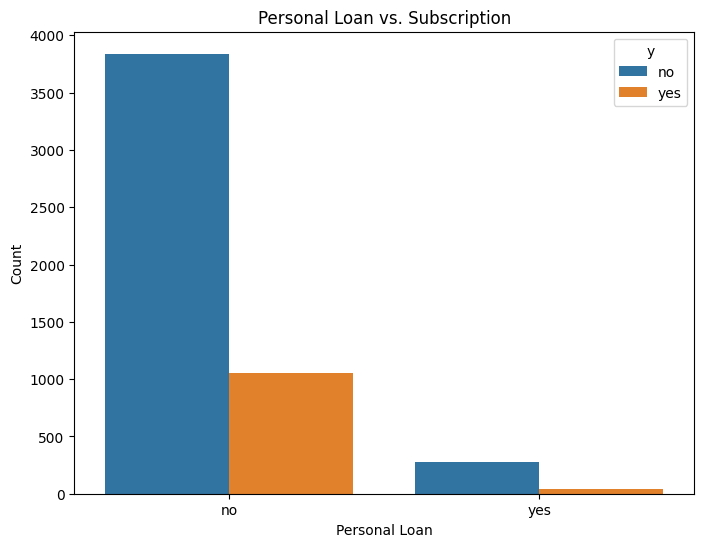

In [86]:
# Personal Loa vs. Subscription

plt.figure(figsize=(8, 6))
sns.countplot(x='loan', hue='y', data=df3)
plt.title('Personal Loan vs. Subscription')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.show()

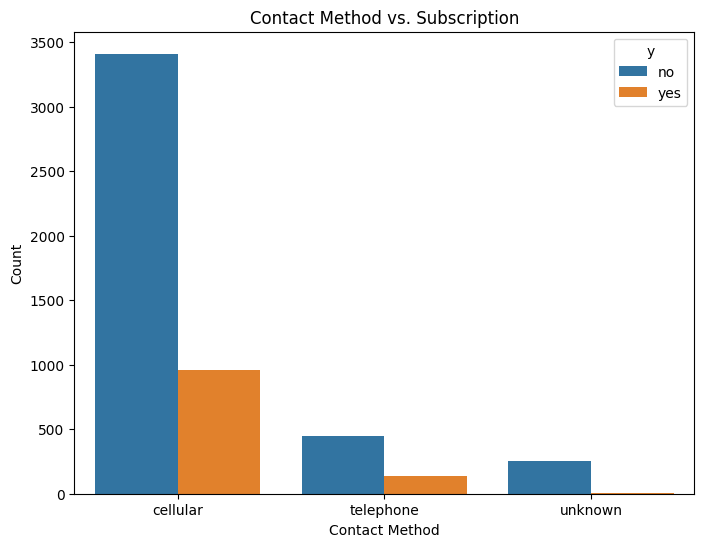

In [88]:
# Contact Methods vs. Subscription

plt.figure(figsize=(8, 6))
sns.countplot(x='contact', hue='y', data=df3)
plt.title('Contact Method vs. Subscription')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.show()


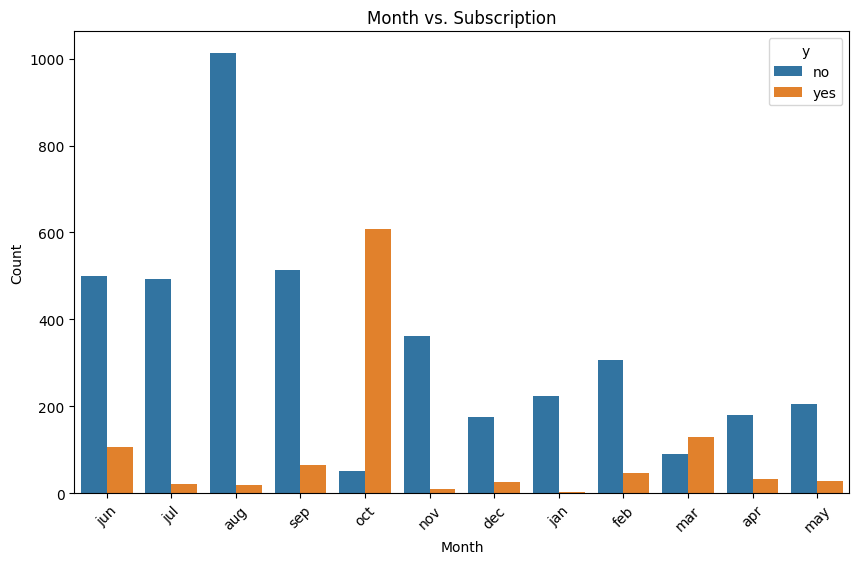

In [105]:
# Month vs. Subscription

plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='y', data=df3)
plt.title('Month vs. Subscription')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


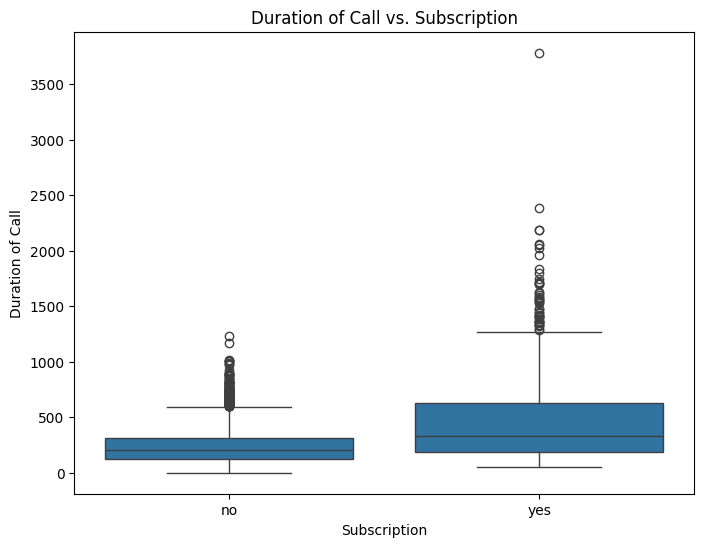

In [92]:
# Duration of Call vs. Subscription
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='duration', data=df3)
plt.title('Duration of Call vs. Subscription')
plt.xlabel('Subscription')
plt.ylabel('Duration of Call')
plt.show()


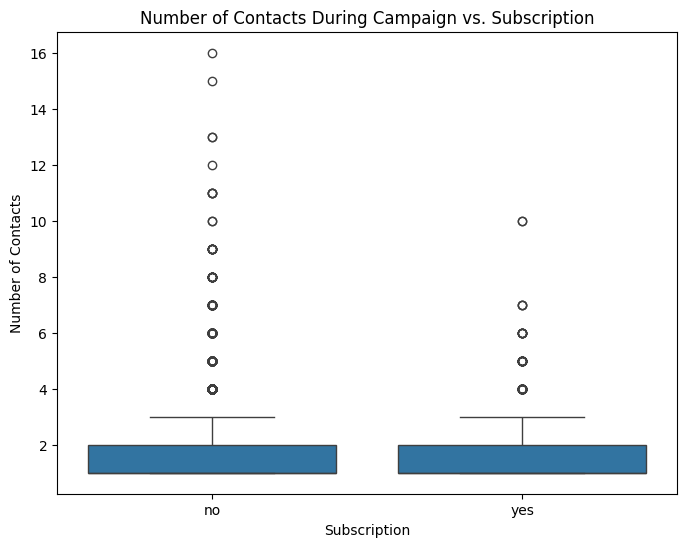

In [94]:

#  Number of Contacts During Campaign vs. Subscription
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='campaign', data=df3)
plt.title('Number of Contacts During Campaign vs. Subscription')
plt.xlabel('Subscription')
plt.ylabel('Number of Contacts')
plt.show()


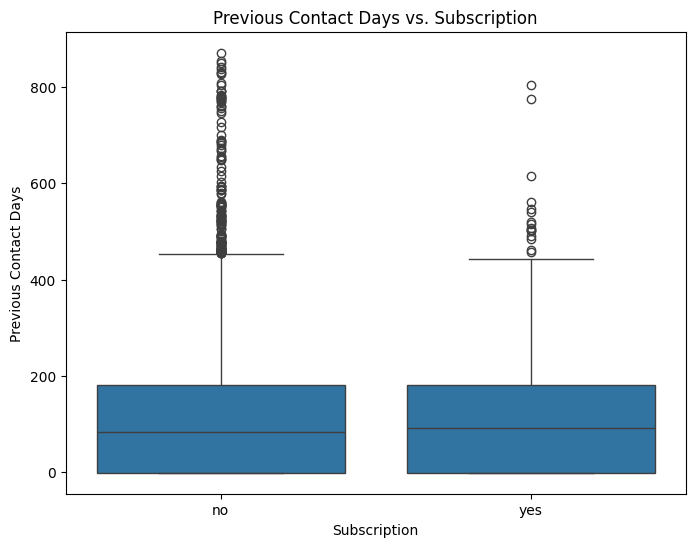

In [96]:

# Previous Contact Days vs. Subscription
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='pdays', data=df3)
plt.title('Previous Contact Days vs. Subscription')
plt.xlabel('Subscription')
plt.ylabel('Previous Contact Days')
plt.show()


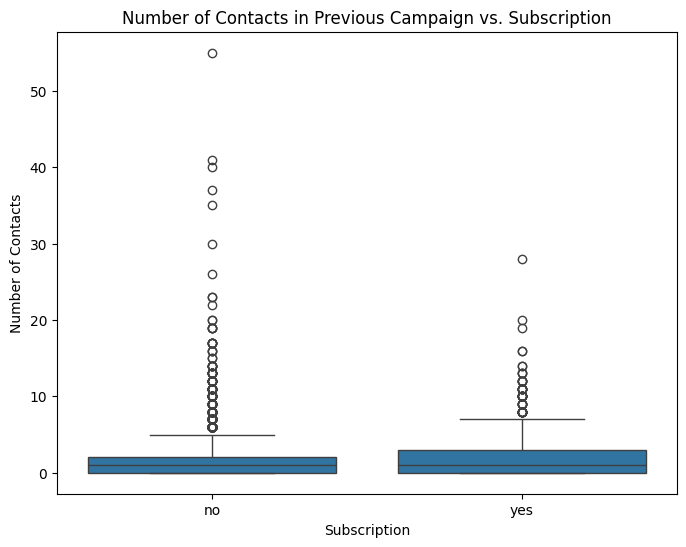

In [98]:

# Number of Contacts in Previous Campaign vs. Subscription
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='previous', data=df3)
plt.title('Number of Contacts in Previous Campaign vs. Subscription')
plt.xlabel('Subscription')
plt.ylabel('Number of Contacts')
plt.show()


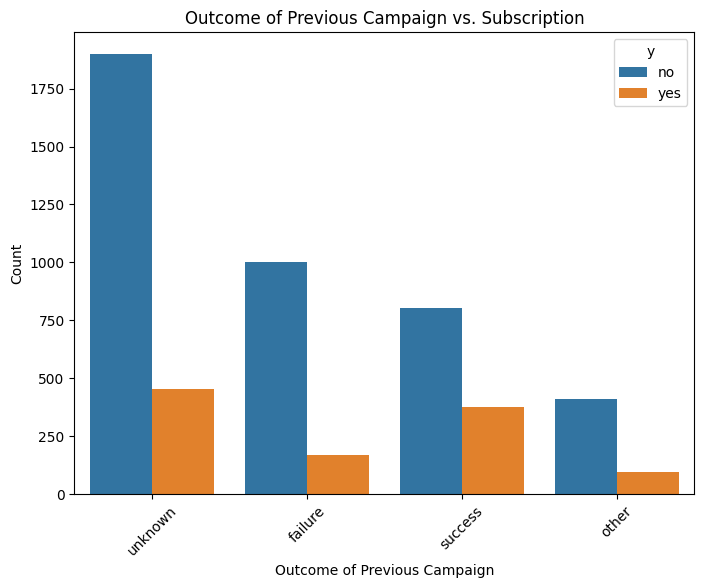

In [100]:

# Outcome of Previous Campaign vs. Subscription
plt.figure(figsize=(8, 6))
sns.countplot(x='poutcome', hue='y', data=df3)
plt.title('Outcome of Previous Campaign vs. Subscription')
plt.xlabel('Outcome of Previous Campaign')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()